# **Pretrained Speech Model Learns Well as Infants and Encodes Abstractions through Exemplars in the Poverty of the Stimulus Environment**

This is a notebook to produce all the results presented by the paper. It loads the finetuned model from the output and measures the accuracy and probability produced by the model.

what we need:
-   dataset for measurement
We need tone/manifest7 (contains the training data with 'O' ignored) tone/manifest9 (contains the real label).Make sure it is the same format as the faiseq. And the same for phone task.
-   model weight    
The model finetuned in different situation.
-   wave files  
The wave files is needed to inference the feature and the emissions.


To set the environment, you can run
```bash
sh install_pytorch5.sh
```
or
```bash
pip install -r requirement.txt
```


In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount= True)
import sys
sys.path.append('/content/drive/MyDrive/users/wangyiming/coling/')


Mounted at /content/drive


## parameters set up

As the first step, we set all the parameters needed for running this notebook. We need to specify the location of the weight and working directory, type of device and dataframe to record the result for plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cps = {
    'emissions_manifest7_last': '/mnt/hd/data_wangyiming/coling/tone/outputs/2023-05-16/17-40-58/checkpoints/checkpoint_last.pt',
    'emissions_manifest7_1_last': '/mnt/hd/data_wangyiming/coling/tone/outputs/2024-03-08/08-26-12/checkpoints/checkpoint_last.pt',
    'emissions_manifest7_10p_last': '/mnt/hd/data_wangyiming/coling/tone/outputs/2024-03-06/23-24-03/checkpoints/checkpoint_last.pt',
    'emissions_manifest7_25p_last': '/mnt/hd/data_wangyiming/coling/tone/outputs/2024-03-08/08-26-17/checkpoints/checkpoint_last.pt',
    'emissions_manifest7_50p_last': '/mnt/hd/data_wangyiming/coling/tone/outputs/2024-03-08/08-26-57/checkpoints/checkpoint_last.pt',
    'emissions_manifest7_75p_last': '/mnt/hd/data_wangyiming/coling/tone/outputs/2024-03-08/08-27-27/checkpoints/checkpoint_last.pt',
    'emissions_manifest7_90p_last': '/mnt/hd/data_wangyiming/coling/tone/outputs/2024-03-07/06-26-24/checkpoints/checkpoint_last.pt',
}
task_name = 'tone'
wav_paths = '/mnt/hd/data_wangyiming/aishell/wav/test/'
#target_dir = '/mnt/hd/data_wangyiming/coling/'
target_dir = '/content/drive/MyDrive/users/wangyiming/coling/'
pred_dir = target_dir
model_data = [
        'emissions_manifest7_last',
        ]
device = 'cuda'

pred_file_paths =[
    'emissions_manifest7_last',
    'emissions_manifest7_1e_last',
    'emissions_manifest7_25pe_last',
    'emissions_manifest7_50pe_last',
    'emissions_manifest7_75pe_last',
    'emissions_manifest7_90pe_last',
    'emissions_manifest7_1c_last',

    'emissions_manifest7_1_last',
    'emissions_manifest7_10p_last',
    'emissions_manifest7_25p_last',
    'emissions_manifest7_50p_last',
    'emissions_manifest7_75p_last',
    'emissions_manifest7_90p_last',
]

index = ['emissions_manifest7_last',
        'emissions_manifest7_1e_last',
        'emissions_manifest7_10pe_last',
        'emissions_manifest7_25pe_last',
        'emissions_manifest7_50pe_last',
        'emissions_manifest7_75pe_last',
        'emissions_manifest7_90pe_last',
        'emissions_manifest7_1c_last',
        'emissions_manifest7_1_last',
        'emissions_manifest7_10p_last',
        'emissions_manifest7_25p_last',
        'emissions_manifest7_50p_last',
        'emissions_manifest7_75p_last',
        'emissions_manifest7_90p_last',
        ]
columns = ['central', 'all']
df_tone = pd.DataFrame(index=index, columns=columns)
df_phone = pd.DataFrame(index=index, columns=columns)

file_labels = {
    'emissions_manifest7_1e_last': '1 ',
    'emissions_manifest7_10pe_last': '10% ',
    'emissions_manifest7_25pe_last': '25% ',
    'emissions_manifest7_50pe_last': '50% ',
    'emissions_manifest7_75pe_last': '75% ',
    'emissions_manifest7_90pe_last': '90% ',
    'emissions_manifest7_1c_last': '1 correct',

    'emissions_manifest7_90p_last': '90% ',
    'emissions_manifest7_75p_last': '75%',
    'emissions_manifest7_50p_last': '50%',
    'emissions_manifest7_25p_last': '25%',
    'emissions_manifest7_10p_last': '10%',
    'emissions_manifest7_1_last': '1 label',
    'emissions_manifest7_last':'all'
}

noise_file_paths = [
    'emissions_manifest7_1e_last',
    'emissions_manifest7_25pe_last',
    'emissions_manifest7_50pe_last',
    'emissions_manifest7_75pe_last',
    'emissions_manifest7_90pe_last',
    'emissions_manifest7_1c_last',
    'emissions_manifest7_last',
]
sparse_file_paths = [

    'emissions_manifest7_1_last',
    'emissions_manifest7_10p_last',
    'emissions_manifest7_25p_last',
    'emissions_manifest7_50p_last',
    'emissions_manifest7_75p_last',
    'emissions_manifest7_90p_last',
    'emissions_manifest7_last',
]


noise_file_paths_for_plot = [

            'emissions_manifest7_last',
            'emissions_manifest7_25pe_last',
            'emissions_manifest7_75pe_last',



        ]
sparse_file_paths_for_plot = [
            'emissions_manifest7_10p_last',

            'emissions_manifest7_90p_last',
            'emissions_manifest7_last',
]

noise_group = [
    'emissions_manifest7_last',
    'emissions_manifest7_1e_last',
    'emissions_manifest7_25pe_last',
    'emissions_manifest7_50pe_last',
    'emissions_manifest7_75pe_last',
    'emissions_manifest7_90pe_last',
    'emissions_manifest7_1c_last',
]
sparse_group = [
    'emissions_manifest7_last',
    'emissions_manifest7_90p_last',
    'emissions_manifest7_75p_last',
    'emissions_manifest7_50p_last',
    'emissions_manifest7_25p_last',
    'emissions_manifest7_10p_last',
    'emissions_manifest7_1_last',
]


## get the emissions

Now we can use the weight of model to produce the emission of the model. It will create a series of directories under the working path. In this case, we get target_dir/tone/emissions_xxx .

### get the inference

After we get the emissions of the model, we can get the prediction(inference) of the model. The result will we stored the same directory as the emissions.

### get the probabilities of target label

Since label 'O's are ignored during the training process. We need to find out the probability of the nearest label. For example, we have a sequence of 'T1 O O O O T2', we want to know the probability of 'T1' or 'T2' to see the changes of probability when it switch from on label to another.
So in our function, direction = 'right' means that we get the nearest right label probalility. The same as 'left'.


## measure of acc & probs

Since there are many problems in installing fairseq, we also provide the inference and probabilities of all the models. You can run the notebook from here if fairseq is not installed and use 'source_without_fairseq.py'. Remember to rename it as source.py in the working directory.

### Acurracy

We calculate the accuracy of the inference on two situation.
One is just selecting those of central frames.
The other is calculate all frames, where 'O's are replaced to the real label basing on the force-alignment boundary.

In [3]:

from source_without_fairseq import cal_acc
task_name = 'tone'
cal_acc(pred_file_paths, target_dir, task_name)


/content/drive/MyDrive/users/wangyiming/coling//tone/emissions_manifest7_last_test.txt
acc of all frames: 0.7617759571037951
acc of central frames: 0.9657781950283685
/content/drive/MyDrive/users/wangyiming/coling//tone/emissions_manifest7_1e_last_test.txt
acc of all frames: 0.7477070285200653
acc of central frames: 0.9615412873994857
/content/drive/MyDrive/users/wangyiming/coling//tone/emissions_manifest7_25pe_last_test.txt
acc of all frames: 0.7284694005664237
acc of central frames: 0.95422670313074
/content/drive/MyDrive/users/wangyiming/coling//tone/emissions_manifest7_50pe_last_test.txt
acc of all frames: 0.6935567918065226
acc of central frames: 0.9189191395567166
/content/drive/MyDrive/users/wangyiming/coling//tone/emissions_manifest7_75pe_last_test.txt
acc of all frames: 0.5365858807399284
acc of central frames: 0.6765255724723458
/content/drive/MyDrive/users/wangyiming/coling//tone/emissions_manifest7_90pe_last_test.txt
acc of all frames: 0.27955419412399324
acc of central fra

In [4]:
from source_without_fairseq import cal_acc
task_name = 'phone'
cal_acc(pred_file_paths, target_dir, task_name)

/content/drive/MyDrive/users/wangyiming/coling//phone/emissions_manifest7_last_test.txt
acc of all frames: 0.7875805664903398
acc of central frames: 0.9757493841424866
/content/drive/MyDrive/users/wangyiming/coling//phone/emissions_manifest7_1e_last_test.txt
acc of all frames: 0.7895060514447804
acc of central frames: 0.9751084563231671
/content/drive/MyDrive/users/wangyiming/coling//phone/emissions_manifest7_25pe_last_test.txt
acc of all frames: 0.79024491324207
acc of central frames: 0.974179764993133
/content/drive/MyDrive/users/wangyiming/coling//phone/emissions_manifest7_50pe_last_test.txt
acc of all frames: 0.7869644779691412
acc of central frames: 0.9715419328115803
/content/drive/MyDrive/users/wangyiming/coling//phone/emissions_manifest7_75pe_last_test.txt
acc of all frames: 0.7780764705294139
acc of central frames: 0.9647489699374332
/content/drive/MyDrive/users/wangyiming/coling//phone/emissions_manifest7_90pe_last_test.txt
acc of all frames: 0.7531301630051342
acc of central

This is a block shows how we encode the position of frames between the central frames.
For example, sequence 'T1 O O O O O T2' with real label 'T1 T1 T1 T1 T2 T2 T2', we normalize all the frame position on the left of boundary to 0 - 0.5.
To achieve this, we first assign 0.5 , 1.5 , 2.5 , 3.5 to T1 , T1 , T1 , T1. Then we divide the positions with 8 (4*2) . And for T2 , T2 , T2, we use the same strategy, but at the end of calculation, we add 0.5 to it in order to make it locat in 0.5 - 1.0.

In [5]:
import numpy as np
# Example usage
line = 'O O O O O O O O O O sil O O O O O O O O O O O O O O sh O O O O O O en O O O O O zh O O O O O ix O O O O O ch O O O O u O O O O O x O O O O O O O ian O O O O O O O j O O O O O O O iao O O O O O ii O O O O i O O O O O O j O O O O i O O O O h O O O O O u O O O O O t O O O O O ing O O O O O zh O O O O ix O O d O O O e O O O O O O O q O O O O O O ing O O O O O O O k O O O O O O O O uang O O O O O O O O O O O O O O O O sil O O O O O O O O O O'.split()
tags = 'sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sh sh sh sh sh sh sh en en en en en en en en zh zh zh zh ix ix ix ix ix ix ix ix ch ch ch ch u u u u u u x x x x x x ian ian ian ian ian ian ian ian ian ian ian j j j j iao iao iao iao iao iao iao iao iao iao iao iao ii i i i i i i i i j j j j j i i i i i h h h h h h u u u u u u u t t t t t ing ing ing ing ing ing ing zh zh zh zh ix ix ix ix ix ix d e e e e e e q q q q q q q q q ing ing ing ing ing ing ing k k k k k k k k uang uang uang uang uang uang uang uang uang uang sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil sil'.split()


from source_without_fairseq import get_pos
pos = get_pos(line, tags)
print(pos[0:35])
pos = get_pos(line, tags, 'right')
print(pos[0:35])


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.022727272727272728, 0.06818181818181818, 0.11363636363636363, 0.1590909090909091, 0.20454545454545456, 0.25, 0.29545454545454547, 0.3409090909090909, 0.38636363636363635, 0.4318181818181818, 0.4772727272727273, 0.5625, 0.6875, 0.8125, 0.9375, 0.08333333333333333, 0.25, 0.4166666666666667, 0.5625, 0.6875, 0.8125, 0.9375, 0.0625, 0.1875, 0.3125]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.998, 0.02400000000000002, 0.07399999999999995, 0.124, 0.17400000000000004, 0.22399999999999998, 0.274, 0.32399999999999995, 0.374, 0.42400000000000004, 0.474, 0.5489999999999999, 0.649, 0.749, 0.849, 0.949, 0.124, 0.374, 0.5489999999999999, 0.649, 0.749, 0.849, 0.949, 0.08233333333333326, 0.249]


### probabilities

central probs

We calculate the average probablities of the target label of all central frames.

In [6]:

task_name = 'tone'

from source_without_fairseq import cal_probs_cen
cal_probs_cen(pred_file_paths , target_dir , task_name, df_tone)


emissions_manifest7_last
96.04
emissions_manifest7_1e_last
89.97
emissions_manifest7_25pe_last
78.15
emissions_manifest7_50pe_last
57.94
emissions_manifest7_75pe_last
39.65
emissions_manifest7_90pe_last
26.88
emissions_manifest7_1c_last
22.37
emissions_manifest7_1_last
93.11
emissions_manifest7_10p_last
95.97
emissions_manifest7_25p_last
94.71
emissions_manifest7_50p_last
95.56
emissions_manifest7_75p_last
95.79
emissions_manifest7_90p_last
94.29


In [7]:

task_name = 'phone'
cal_probs_cen(pred_file_paths, target_dir, task_name, df_phone)

emissions_manifest7_last
96.93
emissions_manifest7_1e_last
94.15
emissions_manifest7_25pe_last
76.46
emissions_manifest7_50pe_last
53.65
emissions_manifest7_75pe_last
32.25
emissions_manifest7_90pe_last
19.48
emissions_manifest7_1c_last
11.62
emissions_manifest7_1_last
94.58
emissions_manifest7_10p_last
95.52
emissions_manifest7_25p_last
96.37
emissions_manifest7_50p_last
96.7
emissions_manifest7_75p_last
96.83
emissions_manifest7_90p_last
96.89


average probs

Then we calculate the average probabilities of target label of all the frames in the boundary.

['emissions_manifest7_1e_last', 'emissions_manifest7_25pe_last', 'emissions_manifest7_50pe_last', 'emissions_manifest7_75pe_last', 'emissions_manifest7_90pe_last', 'emissions_manifest7_1c_last', 'emissions_manifest7_last']
Tone Task, 1 : Mean Probability for Position in bond 69.44
Tone Task, 25% : Mean Probability for Position in bond 60.66
Tone Task, 50% : Mean Probability for Position in bond 47.50
Tone Task, 75% : Mean Probability for Position in bond 35.58
Tone Task, 90% : Mean Probability for Position in bond 27.50
Tone Task, 1 correct: Mean Probability for Position in bond 24.17
Tone Task, all: Mean Probability for Position in bond 75.49
['emissions_manifest7_1_last', 'emissions_manifest7_10p_last', 'emissions_manifest7_25p_last', 'emissions_manifest7_50p_last', 'emissions_manifest7_75p_last', 'emissions_manifest7_90p_last', 'emissions_manifest7_last']
Tone Task, 1 label: Mean Probability for Position in bond 74.10
Tone Task, 10%: Mean Probability for Position in bond 75.03
Tone 

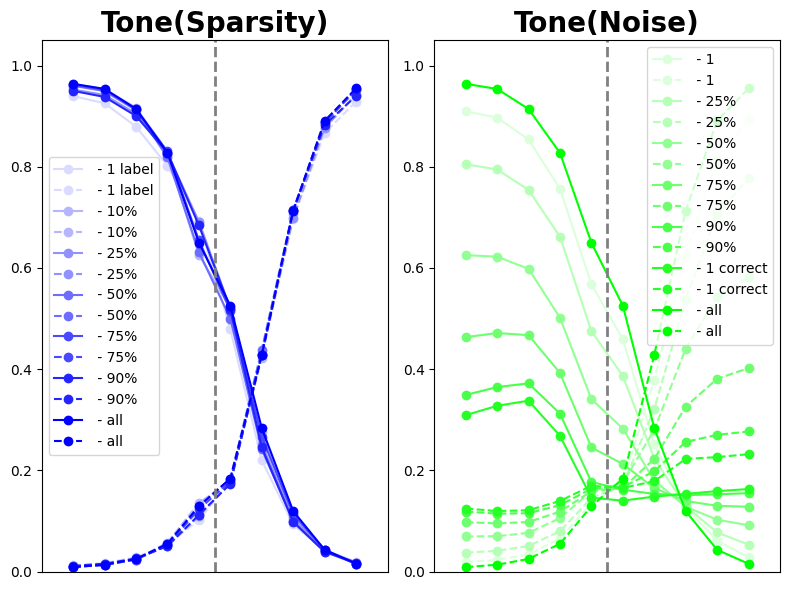

In [8]:


from source_without_fairseq import cal_probs_all_and_plot
task_name = 'tone'
cal_probs_all_and_plot(task_name, noise_file_paths, sparse_file_paths, file_labels, pred_dir, df_tone, plot=False)
# cal_probs_all_and_plot(tasks, group1_file_paths, group2_file_paths, file_labels, pred_dir, ref_file_path, label_file_path, df_tone)


['emissions_manifest7_last', 'emissions_manifest7_25pe_last', 'emissions_manifest7_75pe_last']
Tone Task, all: Mean Probability for Position in bond 75.49
Tone Task, 25% : Mean Probability for Position in bond 60.66
Tone Task, 75% : Mean Probability for Position in bond 35.58
['emissions_manifest7_10p_last', 'emissions_manifest7_90p_last', 'emissions_manifest7_last']
Tone Task, 10%: Mean Probability for Position in bond 75.03
Tone Task, 90% : Mean Probability for Position in bond 75.06
Tone Task, all: Mean Probability for Position in bond 75.49


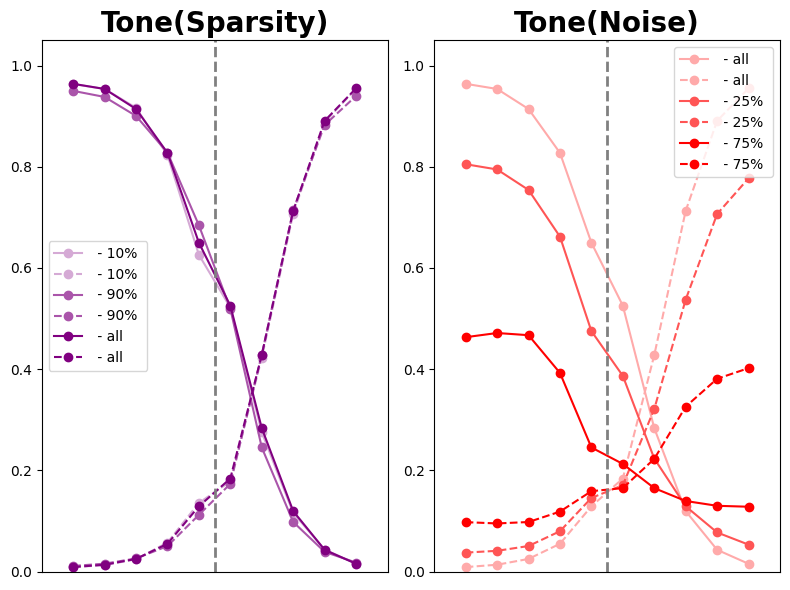

In [9]:

task_name = 'tone'


from source_without_fairseq import cal_probs_all_and_plot
cal_probs_all_and_plot(task_name, noise_file_paths_for_plot, sparse_file_paths_for_plot, file_labels, pred_dir, df_tone , color_style = 1)

['emissions_manifest7_last', 'emissions_manifest7_25pe_last', 'emissions_manifest7_75pe_last']
Phone Task, all: Mean Probability for Position in bond 79.97
Phone Task, 25% : Mean Probability for Position in bond 63.00
Phone Task, 75% : Mean Probability for Position in bond 28.42
['emissions_manifest7_10p_last', 'emissions_manifest7_90p_last', 'emissions_manifest7_last']
Phone Task, 10%: Mean Probability for Position in bond 81.15
Phone Task, 90% : Mean Probability for Position in bond 80.15
Phone Task, all: Mean Probability for Position in bond 79.97


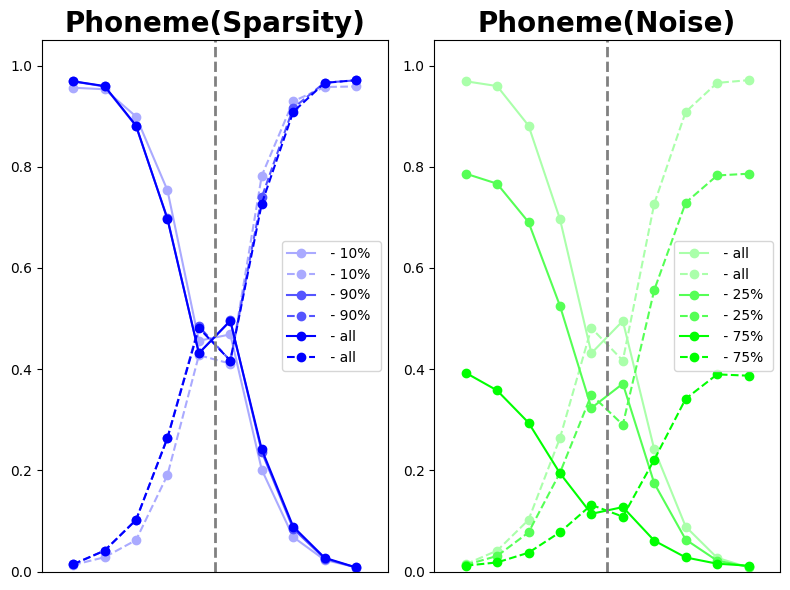

In [10]:
task_name = 'phone'
from source_without_fairseq import cal_probs_all_and_plot
#cal_probs_all_and_plot(task_name, noise_file_paths, sparse_file_paths, file_labels, pred_dir, df_phone, plot=False)
cal_probs_all_and_plot(task_name, noise_file_paths_for_plot, sparse_file_paths_for_plot, file_labels, pred_dir, df_phone, color_style = 0)

### plot every case

Then we plot the curve of probability changes for every model.

In [11]:
file_paths = noise_file_paths + sparse_file_paths

In [ ]:
from source_without_fairseq import plot_single_and_save
task_name = 'tone'

plot_single_and_save(task_name, noise_file_paths, file_labels, pred_dir, is_noise=True)
plot_single_and_save(task_name, sparse_file_paths, file_labels, pred_dir, is_noise=False)

In [ ]:
task_name = 'phone'
plot_single_and_save(task_name, noise_file_paths, file_labels, pred_dir, is_noise=True)
plot_single_and_save(task_name, sparse_file_paths, file_labels, pred_dir, is_noise=False)

#### plot the result

Finally we get all the data we want (stored in df_tone and df_phone), then we can plot it.

In [ ]:
tone_x_axis_noise = np.array([1.00,1-0.071,0.9,0.75,0.5,0.25,0.071])
tone_x_axis_sparse = np.array([1.00,0.90,0.75,0.50,0.25,0.10,0.071])


#plot_filtered_data(sparsity_ratio, tone_acc, '#003366', '^', 'Central', 4, 4)
#plot_filtered_data(sparsity_ratio, tone_acc_others, '#6699CC', 's', 'Others', 4, 4)
color_for_central = '#003366'
color_for_all = '#6699CC'
marker_for_central = '^'
marker_for_all = 's'




In [ ]:

tone_acc_noise_cen = df_tone.loc[noise_group, 'central'].values
tone_acc_noise_all = df_tone.loc[noise_group, 'all'].values

indices = np.argsort(tone_x_axis_noise)  #

x = tone_x_axis_noise[indices]
x = [1-i for i in x]
y_cen = tone_acc_noise_cen[indices]
y_all = tone_acc_noise_all[indices]
print(y_cen,y_all)
#


plt.figure(figsize=(6, 6))
plt.title('Tone(Noise)', fontdict={'weight':'bold', 'size':20})
plt.plot(x,y_cen, color=color_for_central, marker=marker_for_central, label='Central',linewidth=4, markeredgewidth=4)
plt.plot(x,y_all, color=color_for_all, marker=marker_for_all, label='All',linewidth=4, markeredgewidth=4)

plt.grid(True, which='both', linestyle='--', linewidth=1.0)
plt.xticks(np.arange(0., 1.2, 0.2), labels=[f"{x:.1f}" for x in np.arange(0., 1.2, 0.2)])
plt.yticks(np.arange(0., 1.2, 0.2), labels=[f"{y:.2f}" for y in np.arange(0., 1.2, 0.2)])
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.xlim(-0.05, 1.05)  #
plt.xlabel('Ratio', fontdict={'weight':'bold', 'size':20})
plt.ylabel('Probability', fontdict={'weight':'bold', 'size':20})
plt.legend(loc='lower left', prop={'weight':'bold', 'size':20})
plt.tight_layout()
plt.show()


In [ ]:
# 从dataframe中取出数据
tone_acc_sparse_cen = df_tone.loc[sparse_group, 'central'].values
tone_acc_sparse_all = df_tone.loc[sparse_group, 'all'].values

indices = np.argsort(tone_x_axis_sparse)  #

x = tone_x_axis_sparse[indices]
y_cen = tone_acc_sparse_cen[indices]
y_all = tone_acc_sparse_all[indices]
print(y_cen,y_all)
#


plt.figure(figsize=(6, 6))
plt.title('Tone(Sparsity)', fontdict={'weight':'bold', 'size':20})
plt.plot(x,y_cen, color=color_for_central, marker=marker_for_central, label='Central',linewidth=4, markeredgewidth=4)
plt.plot(x,y_all, color=color_for_all, marker=marker_for_all, label='All',linewidth=4, markeredgewidth=4)

plt.grid(True, which='both', linestyle='--', linewidth=1.0)
plt.xticks(np.arange(0., 1.2, 0.2), labels=[f"{x:.1f}" for x in np.arange(0., 1.2, 0.2)])
plt.yticks(np.arange(0., 1.2, 0.2), labels=[f"{y:.2f}" for y in np.arange(0., 1.2, 0.2)])
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.xlim(1.05, -0.05)  #
plt.xlabel('Ratio', fontdict={'weight':'bold', 'size':20})
plt.ylabel('Probability', fontdict={'weight':'bold', 'size':20})
plt.legend(loc='lower left', prop={'weight':'bold', 'size':20})
plt.legend(loc='lower left', prop={'weight':'bold', 'size':20})
plt.tight_layout()
plt.show()


## phoneme

In [ ]:
phone_x_axis_noise = np.array([1.00,1-0.035,0.9,0.75,0.5,0.25,0.035])
phone_x_axis_sparse = np.array([1.00,0.90,0.75,0.50,0.25,0.10,0.035])


#plot_filtered_data(sparsity_ratio, tone_acc, '#003366', '^', 'Central', 4, 4)
#plot_filtered_data(sparsity_ratio, tone_acc_others, '#6699CC', 's', 'Others', 4, 4)

# plot_filtered_data(sparsity_ratio, phoneme_acc, '#006400', '^', 'Central', 4, 4)
# plot_filtered_data(sparsity_ratio, phoneme_acc_others, '#90EE90', 's', 'Others', 4, 4)
color_for_central = '#006400'
color_for_all = '#90EE90'
marker_for_central = '^'
marker_for_all = 's'




In [ ]:
# 从dataframe中取出数据
phone_acc_noise_cen = df_phone.loc[noise_group, 'central'].values
phone_acc_noise_all = df_phone.loc[noise_group, 'all'].values

indices = np.argsort(phone_x_axis_noise)

x = phone_x_axis_noise[indices]
x = [1-i for i in x]
y_cen = phone_acc_noise_cen[indices]
y_all = phone_acc_noise_all[indices]
print(y_cen,y_all)



plt.figure(figsize=(6, 6))
plt.title('Phoneme(Noise)', fontdict={'weight':'bold', 'size':20})
plt.plot(x,y_cen, color=color_for_central, marker=marker_for_central, label='Central',linewidth=4, markeredgewidth=4)
plt.plot(x,y_all, color=color_for_all, marker=marker_for_all, label='All',linewidth=4, markeredgewidth=4)

plt.grid(True, which='both', linestyle='--', linewidth=1.0)
plt.xticks(np.arange(0., 1.2, 0.2), labels=[f"{x:.1f}" for x in np.arange(0., 1.2, 0.2)])
plt.yticks(np.arange(0., 1.2, 0.2), labels=[f"{y:.2f}" for y in np.arange(0., 1.2, 0.2)])
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.xlim(-0.05, 1.05)
plt.xlabel('Ratio', fontdict={'weight':'bold', 'size':20})
plt.ylabel('Probability', fontdict={'weight':'bold', 'size':20})
plt.legend(loc='lower left', prop={'weight':'bold', 'size':20})
plt.tight_layout()
plt.show()


In [ ]:
# 从dataframe中取出数据
phone_acc_sparse_cen = df_phone.loc[sparse_group, 'central'].values
phone_acc_sparse_all = df_phone.loc[sparse_group, 'all'].values

indices = np.argsort(phone_x_axis_sparse)  #

x = phone_x_axis_sparse[indices]
y_cen = phone_acc_sparse_cen[indices]
y_all = phone_acc_sparse_all[indices]
print(y_cen,y_all)
# 画图


plt.figure(figsize=(6, 6))
plt.title('Phoneme(Sparsity)', fontdict={'weight':'bold', 'size':20})
plt.plot(x,y_cen, color=color_for_central, marker=marker_for_central, label='Central',linewidth=4, markeredgewidth=4)
plt.plot(x,y_all, color=color_for_all, marker=marker_for_all, label='All',linewidth=4, markeredgewidth=4)

plt.grid(True, which='both', linestyle='--', linewidth=1.0)
plt.xticks(np.arange(0., 1.2, 0.2), labels=[f"{x:.1f}" for x in np.arange(0., 1.2, 0.2)])
plt.yticks(np.arange(0., 1.2, 0.2), labels=[f"{y:.2f}" for y in np.arange(0., 1.2, 0.2)])
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.xlim(1.05, -0.05)  #
plt.ylim(0, 1.02)
plt.xlabel('Ratio', fontdict={'weight':'bold', 'size':20})
plt.ylabel('Probability', fontdict={'weight':'bold', 'size':20})
plt.legend(loc='lower left', prop={'weight':'bold', 'size':20})
plt.tight_layout()
plt.show()
